In [1]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
from matplotlib.colors import LogNorm
from astropy.visualization.stretch import SinhStretch
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data
from cycler import cycler
from itertools import cycle
from scipy.stats import ks_2samp
from scipy.optimize import fsolve
from spectral_cube import Projection
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles

fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [10]:
a_fixednames =['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.C18O.spw31.fits' 
               ]
cube_17 = SpectralCube.read(a_fixednames[0]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
#cube_21 = SpectralCube.read(a_fixednames[2]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
#cube_23 = SpectralCube.read(a_fixednames[3]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
#cube_25 = SpectralCube.read(a_fixednames[4]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
#cube_27 = SpectralCube.read(a_fixednames[5]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
cube_29 = SpectralCube.read(a_fixednames[6]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
cube_31 = SpectralCube.read(a_fixednames[7]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')

cube_17 = cube_17.spectral_slab(15*u.km/u.second, 225*u.km/u.second)
cube_29 = cube_29.spectral_slab(15*u.km/u.second, 225*u.km/u.second)
cube_31 = cube_31.spectral_slab(15*u.km/u.second, 225*u.km/u.second)

In [50]:
cube_17 = cube_17.reproject(cube_29.header)

In [51]:
cube_31 = cube_31.reproject(cube_29.header)

In [52]:
#combo_fixednames = [
#    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits',
#    'lol',
#    #'/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.spw21.fits',
#    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.masked.spw21.fits',
#    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw23.fits',
#    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits',
#    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.SiO.spw27.fits',
#    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.13CO.spw29.fits',
#    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.C18O.spw31.fits'
#    ]
#
#cube_17_full = SpectralCube.read(combo_fixednames[0]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
##cube_27_full = SpectralCube.read(combo_fixednames[5]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
#cube_29_full = SpectralCube.read(combo_fixednames[6]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
#cube_31_full = SpectralCube.read(combo_fixednames[7]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
#
#cube_17_full = cube_17_full.spectral_slab(15*u.km/u.second, 225*u.km/u.second)
#cube_29_full = cube_29_full.spectral_slab(15*u.km/u.second, 225*u.km/u.second)
#cube_31_full = cube_31_full.spectral_slab(15*u.km/u.second, 225*u.km/u.second)

In [12]:
def noise_mask(cube, vmin, vmax, level):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).std(axis=0)
    peak = cube.max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

def noise_mask_slab(cube, vmin, vmax, level, cut1, cut2):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).std(axis=0)
    peak = cube.spectral_slab(cut1, cut2).max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

def get_x(mom0):
    ww = wcs.WCS(mom0.header)
    pixelarea = ww.proj_plane_pixel_area()#.to(u.sr)
    #np.sqrt(pixelarea.to(u.rad**2)).to(u.arcsecond)
    x = range(mom0.shape[1]) * np.sqrt(pixelarea.to(u.rad**2)).to(u.arcmin)
    return x

def t_kin(ratio):
    # ratio of spw 23 / spw 25
    return 590*np.power(ratio, 2) + 2.88*ratio + 23.4

In [54]:
mask_17 = noise_mask(cube_17, -100*u.km/u.second, -50 *u.km/u.second, 5)
#mask_23 = noise_mask(cube_23, 50*u.km/u.second, 80 *u.km/u.second, 5)
#mask_25 = noise_mask(cube_25, -100*u.km/u.second, -50 *u.km/u.second, 5)
#mask_27 = noise_mask(cube_27, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_29 = noise_mask(cube_29, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_31 = noise_mask(cube_31, -100*u.km/u.second, -50 *u.km/u.second, 5)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out

In [143]:
cube_17b = cube_17.spectral_slab(15*u.km / u.second, 75*u.km/u.second)
mask_17b = noise_mask_slab(cube_17, -100*u.km/u.second, -50 *u.km/u.second, 5, 15*u.km / u.second, 75*u.km/u.second)

cube_17a = cube_17.spectral_slab(75*u.km / u.second, 200*u.km/u.second)
mask_17a = noise_mask_slab(cube_17, -100*u.km/u.second, -50 *u.km/u.second, 5, 75*u.km / u.second, 200*u.km/u.second)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


In [115]:
cube_29b = cube_29.spectral_slab(15*u.km / u.second, 75*u.km/u.second)
mask_29b = noise_mask_slab(cube_29, -100*u.km/u.second, -50 *u.km/u.second, 5, 15*u.km / u.second, 75*u.km/u.second)

cube_29a = cube_29.spectral_slab(75*u.km / u.second, 200*u.km/u.second)
mask_29a = noise_mask_slab(cube_29, -100*u.km/u.second, -50 *u.km/u.second, 5, 75*u.km / u.second, 200*u.km/u.second)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


In [116]:
cube_31b = cube_31.spectral_slab(15*u.km / u.second, 75*u.km/u.second)
mask_31b = noise_mask_slab(cube_31, -100*u.km/u.second, -50 *u.km/u.second, 5, 15*u.km / u.second, 75*u.km/u.second)

cube_31a = cube_31.spectral_slab(75*u.km / u.second, 200*u.km/u.second)
mask_31a = noise_mask_slab(cube_31, -100*u.km/u.second, -50 *u.km/u.second, 5, 75*u.km / u.second, 200*u.km/u.second)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


# Maximums

## 12CO

INFO: Auto-setting vmin to  9.589e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.353e+02 [aplpy.core]


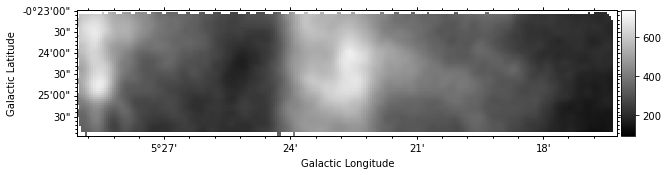

In [144]:
mom0_17 = cube_17.with_mask(mask_17).moment0()
mom0_17.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  2.686e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.591e+01 [aplpy.core]


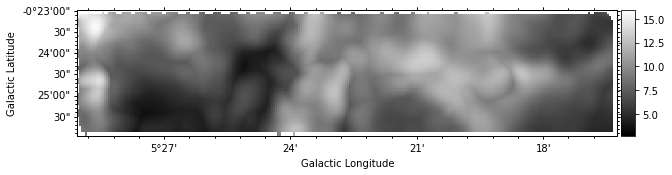

In [145]:
max_17 = cube_17.with_mask(mask_17).max(axis=0)
max_17.quicklook()

INFO: Auto-setting vmin to -5.787e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.585e+02 [aplpy.core]


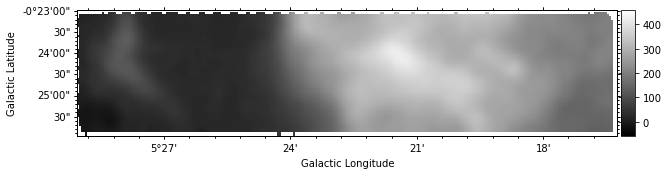

In [146]:
mom0_17b = cube_17b.with_mask(mask_17b).moment0()
mom0_17b.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to -1.108e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.448e+01 [aplpy.core]


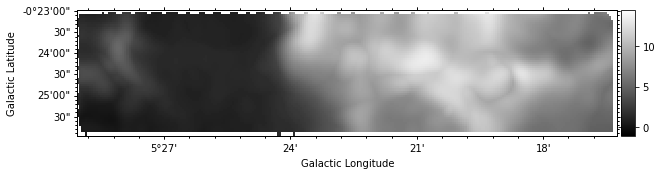

In [147]:
max_17b = cube_17b.with_mask(mask_17b).max(axis=0)
max_17b.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  2.574e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.414e+01 [aplpy.core]


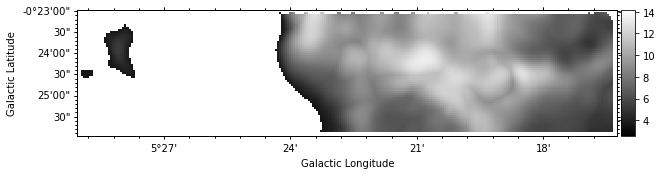

In [160]:
max_17b = cube_17b.with_mask(mask_17b).max(axis=0)
mask_17b2 = max_17b.value>3.5
max_17b = max_17b*mask_17b2
max_17b[max_17b==0] = np.nan
max_17b.quicklook()

INFO: Auto-setting vmin to -6.275e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.032e+02 [aplpy.core]


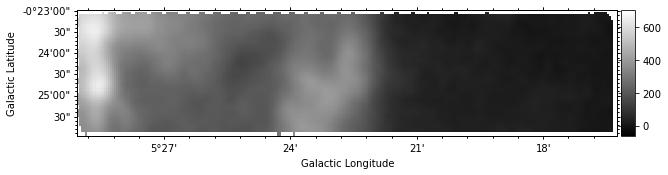

In [149]:
mom0_17a = cube_17a.with_mask(mask_17a).moment0()
mom0_17a.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  2.394e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.645e+01 [aplpy.core]


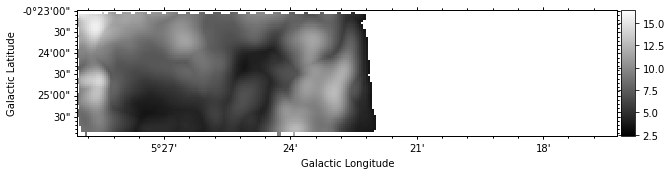

In [159]:
max_17a = cube_17a.with_mask(mask_17a).max(axis=0)
mask_17a2 = max_17a.value>3.5
max_17a = max_17a*mask_17a2
max_17a[max_17a==0] = np.nan
max_17a.quicklook()

INFO: Auto-setting vmin to  2.046e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.764e+02 [aplpy.core]


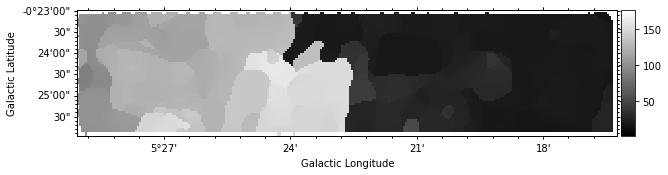

In [151]:
world_argmax_map_17 = cube_17.with_mask(mask_17).argmax_world(axis=0) 
world_argmax_map_17.quicklook()

INFO: Auto-setting vmin to  8.221e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.746e+02 [aplpy.core]


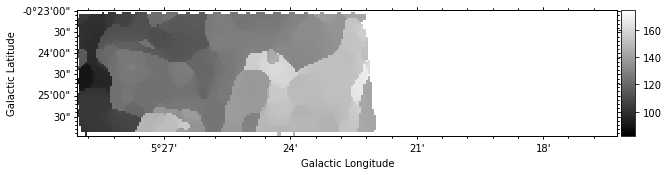

In [161]:
world_argmax_map_17a = cube_17a.with_mask(mask_17a).argmax_world(axis=0) 
world_argmax_map_17a = world_argmax_map_17a*mask_17a2
world_argmax_map_17a[world_argmax_map_17a==0] = np.nan
world_argmax_map_17a.quicklook()

INFO: Auto-setting vmin to  1.061e+01 [aplpy.core]
INFO: Auto-setting vmax to  8.134e+01 [aplpy.core]


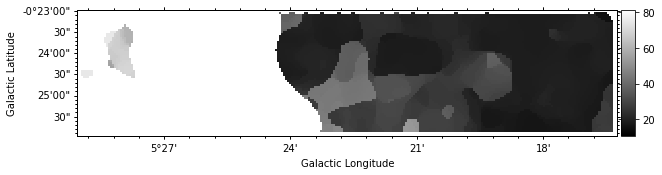

In [162]:
world_argmax_map_17b = cube_17b.with_mask(mask_17b).argmax_world(axis=0) 
world_argmax_map_17b = world_argmax_map_17b*mask_17b2
world_argmax_map_17b[world_argmax_map_17b==0] = np.nan
world_argmax_map_17b.quicklook()

## 13CO

INFO: Auto-setting vmin to -3.288e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.007e+01 [aplpy.core]


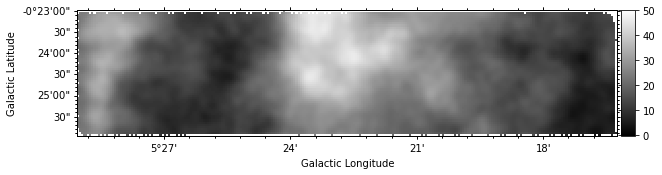

In [58]:
mom0_29 = cube_29.with_mask(mask_29).moment0()
mom0_29.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  1.054e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.650e+00 [aplpy.core]


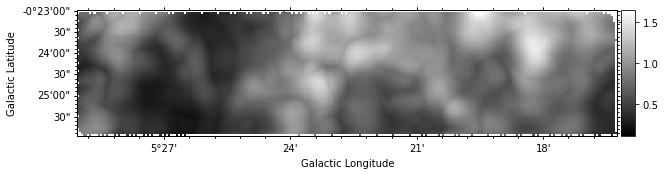

In [59]:
max_29 = cube_29.with_mask(mask_29).max(axis=0)
max_29.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  1.314e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.486e+00 [aplpy.core]


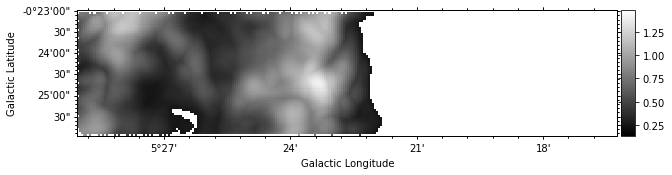

In [166]:
max_29a = cube_29a.with_mask(mask_29a).max(axis=0)
mask_29a2 = max_29a.value>0.24
max_29a = max_29a*mask_29a2
max_29a[max_29a==0] = np.nan
max_29a.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  1.149e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.673e+00 [aplpy.core]


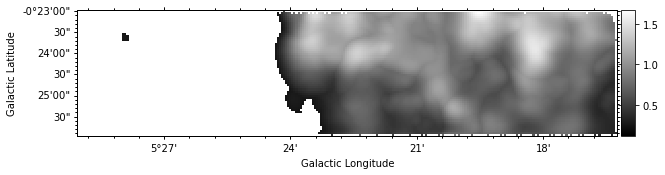

In [167]:
max_29b = cube_29b.with_mask(mask_29b).max(axis=0)
mask_29b2 = max_29b.value>0.24
max_29b = max_29b*mask_29b2
max_29b[max_29b==0] = np.nan
max_29b.quicklook()

INFO: Auto-setting vmin to  1.216e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.696e+02 [aplpy.core]


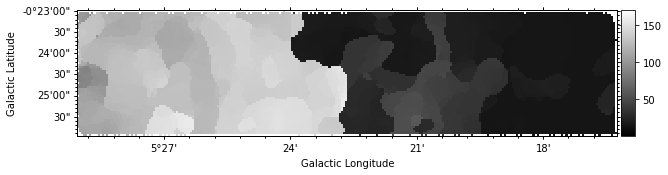

In [60]:
world_argmax_map_29 = cube_29.with_mask(mask_29).argmax_world(axis=0) 
world_argmax_map_29.quicklook()

INFO: Auto-setting vmin to  8.045e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.781e+02 [aplpy.core]


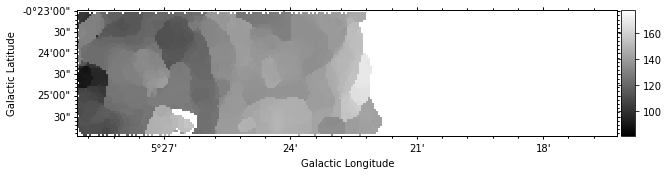

In [172]:
world_argmax_map_29a = cube_29a.with_mask(mask_29a).argmax_world(axis=0) 
world_argmax_map_29a = world_argmax_map_29a*mask_29a2
world_argmax_map_29a[world_argmax_map_29a==0] = np.nan
world_argmax_map_29a.quicklook()

INFO: Auto-setting vmin to  1.068e+01 [aplpy.core]
INFO: Auto-setting vmax to  6.453e+01 [aplpy.core]


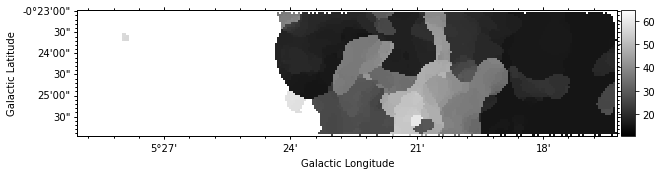

In [173]:
world_argmax_map_29b = cube_29b.with_mask(mask_29b).argmax_world(axis=0) 
world_argmax_map_29b = world_argmax_map_29b*mask_29b2
world_argmax_map_29b[world_argmax_map_29b==0] = np.nan
world_argmax_map_29b.quicklook()

## C18O

INFO: Auto-setting vmin to -9.593e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.636e+00 [aplpy.core]


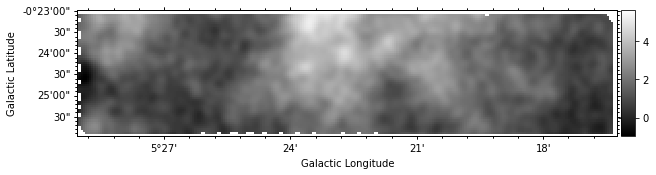

In [61]:
mom0_31 = cube_31.with_mask(mask_31).moment0()
mom0_31.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  1.512e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.277e-01 [aplpy.core]


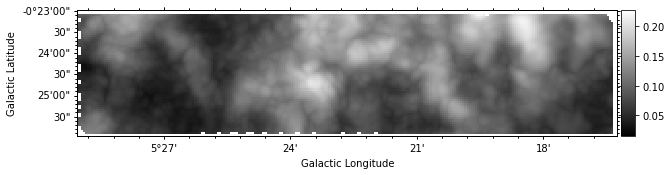

In [62]:
max_31 = cube_31.with_mask(mask_31).max(axis=0)
max_31.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  2.481e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.133e-01 [aplpy.core]


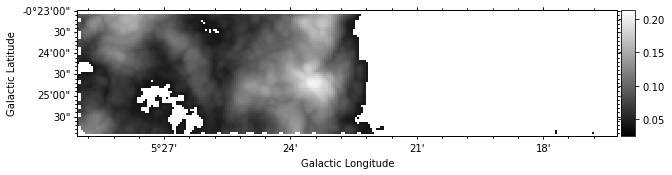

In [181]:
max_31a = cube_31a.with_mask(mask_31a).max(axis=0)
mask_31a2 = max_31a.value>0.04
max_31a = max_31a*mask_31a2
max_31a[max_31a==0] = np.nan
max_31a.quicklook()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  2.380e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.304e-01 [aplpy.core]


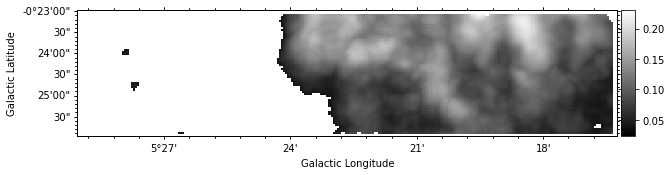

In [184]:
max_31b = cube_31b.with_mask(mask_31b).max(axis=0)
mask_31b2 = max_31b.value>0.04
max_31b = max_31b*mask_31b2
max_31b[max_31b==0] = np.nan
max_31b.quicklook()

INFO: Auto-setting vmin to  1.150e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.703e+02 [aplpy.core]


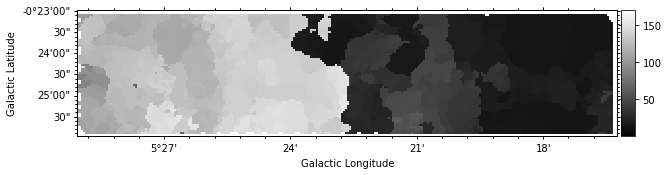

In [63]:
world_argmax_map_31 = cube_31.with_mask(mask_31).argmax_world(axis=0) 
world_argmax_map_31.quicklook()

INFO: Auto-setting vmin to  8.115e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.784e+02 [aplpy.core]


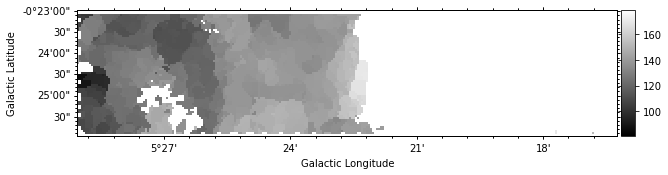

In [185]:
world_argmax_map_31a = cube_31a.with_mask(mask_31a).argmax_world(axis=0) 
world_argmax_map_31a = world_argmax_map_31a*mask_31a2
world_argmax_map_31a[world_argmax_map_31a==0] = np.nan
world_argmax_map_31a.quicklook()

INFO: Auto-setting vmin to  1.038e+01 [aplpy.core]
INFO: Auto-setting vmax to  6.784e+01 [aplpy.core]


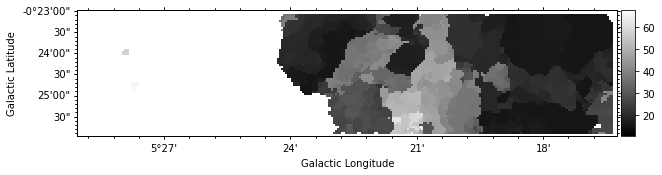

In [186]:
world_argmax_map_31b = cube_31b.with_mask(mask_31b).argmax_world(axis=0) 
world_argmax_map_31b = world_argmax_map_31b*mask_31b2
world_argmax_map_31b[world_argmax_map_31b==0] = np.nan
world_argmax_map_31b.quicklook()

# Cube with args

In [64]:
cube_17.spectral_axis

<Quantity [ 15.13100654,  15.46310303,  15.79519951,  16.127296  ,
            16.45939249,  16.79148897,  17.12358546,  17.45568194,
            17.78777843,  18.11987492,  18.4519714 ,  18.78406789,
            19.11616437,  19.44826086,  19.78035735,  20.11245383,
            20.44455032,  20.7766468 ,  21.10874329,  21.44083978,
            21.77293626,  22.10503275,  22.43712923,  22.76922572,
            23.10132221,  23.43341869,  23.76551518,  24.09761166,
            24.42970815,  24.76180463,  25.09390112,  25.42599761,
            25.75809409,  26.09019058,  26.42228706,  26.75438355,
            27.08648004,  27.41857652,  27.75067301,  28.08276949,
            28.41486598,  28.74696247,  29.07905895,  29.41115544,
            29.74325192,  30.07534841,  30.4074449 ,  30.73954138,
            31.07163787,  31.40373435,  31.73583084,  32.06792733,
            32.40002381,  32.7321203 ,  33.06421678,  33.39631327,
            33.72840975,  34.06050624,  34.39260273,  34.72469

In [65]:
cube_29.spectral_axis

<Quantity [ 15.13100654,  15.46310303,  15.79519951,  16.127296  ,
            16.45939249,  16.79148897,  17.12358546,  17.45568194,
            17.78777843,  18.11987492,  18.4519714 ,  18.78406789,
            19.11616437,  19.44826086,  19.78035735,  20.11245383,
            20.44455032,  20.7766468 ,  21.10874329,  21.44083978,
            21.77293626,  22.10503275,  22.43712923,  22.76922572,
            23.10132221,  23.43341869,  23.76551518,  24.09761166,
            24.42970815,  24.76180463,  25.09390112,  25.42599761,
            25.75809409,  26.09019058,  26.42228706,  26.75438355,
            27.08648004,  27.41857652,  27.75067301,  28.08276949,
            28.41486598,  28.74696247,  29.07905895,  29.41115544,
            29.74325192,  30.07534841,  30.4074449 ,  30.73954138,
            31.07163787,  31.40373435,  31.73583084,  32.06792733,
            32.40002381,  32.7321203 ,  33.06421678,  33.39631327,
            33.72840975,  34.06050624,  34.39260273,  34.72469

In [66]:
cube_31.spectral_axis

<Quantity [ 15.13100654,  15.46310303,  15.79519951,  16.127296  ,
            16.45939249,  16.79148897,  17.12358546,  17.45568194,
            17.78777843,  18.11987492,  18.4519714 ,  18.78406789,
            19.11616437,  19.44826086,  19.78035735,  20.11245383,
            20.44455032,  20.7766468 ,  21.10874329,  21.44083978,
            21.77293626,  22.10503275,  22.43712923,  22.76922572,
            23.10132221,  23.43341869,  23.76551518,  24.09761166,
            24.42970815,  24.76180463,  25.09390112,  25.42599761,
            25.75809409,  26.09019058,  26.42228706,  26.75438355,
            27.08648004,  27.41857652,  27.75067301,  28.08276949,
            28.41486598,  28.74696247,  29.07905895,  29.41115544,
            29.74325192,  30.07534841,  30.4074449 ,  30.73954138,
            31.07163787,  31.40373435,  31.73583084,  32.06792733,
            32.40002381,  32.7321203 ,  33.06421678,  33.39631327,
            33.72840975,  34.06050624,  34.39260273,  34.72469

In [67]:
world_argmax_map_31[50,50]

<Quantity 111.77108395 km / s>

In [68]:
cube_31[:,50,50]

<OneDSpectrum [ 6.62345759e-03,-3.15955438e-03,-1.93152347e-03,
               -4.27360616e-03,-5.38577769e-03,-3.63057660e-03,
               -3.45365829e-04,-2.35877724e-03, 6.93391250e-03,
                1.00884067e-02, 4.95026632e-04, 9.61376266e-04,
               -3.12812315e-03,-4.75106060e-03,-4.60342972e-03,
               -1.05641504e-02,-1.23305259e-02,-7.01387506e-03,
                2.51392761e-03, 1.10100985e-02, 1.00459331e-02,
                7.22295866e-03, 1.57350109e-03,-1.15490049e-02,
               -8.64608987e-03, 6.35881849e-03, 1.72007578e-02,
                2.18343380e-03,-1.90882170e-02,-1.11308804e-02,
               -6.45093519e-03,-6.35316215e-03,-5.98463618e-04,
                2.35835009e-03, 2.41763599e-03,-5.74095946e-03,
               -1.05077188e-02,-7.62052966e-03, 3.65796879e-05,
                3.23141122e-03,-1.64717027e-03,-8.65192257e-03,
               -4.38745567e-03, 2.41657384e-03,-3.61752787e-04,
               -5.92401908e-03,-6.640294

In [81]:
from scipy.interpolate import interp1d
inter = interp1d(cube_17.spectral_axis, cube_17[:,50,50], fill_value="extrapolate")

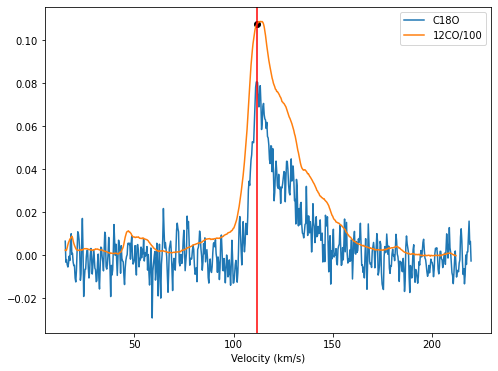

In [82]:
plt.figure(figsize=(8,6))
plt.plot(cube_31.spectral_axis, cube_31[:,50,50], label='C18O')
plt.plot(cube_17.spectral_axis, cube_17[:,50,50]/100, label='12CO/100')
plt.axvline(world_argmax_map_31[50,50].value, color='red')
plt.scatter(world_argmax_map_31[50,50].value, inter(world_argmax_map_31[50,50].value)/100, color='k')
plt.xlabel('Velocity (km/s)')
plt.legend()

In [189]:
cube_17.shape[1:]

(61, 262)

In [191]:
def given_max(cube, world_arg_max_alt):
    #max_cube = cube.max(axis=0)
    sh = world_arg_max_alt.shape
    given = np.zeros(sh)
    for ii in range(sh[0]):
        for jj in range(sh[1]):
            inter = interp1d(cube.spectral_axis, cube[:, ii, jj], fill_value="extrapolate")
            maxim = world_arg_max_alt[ii, jj]
            given[ii, jj] = inter(maxim)
    return given

In [216]:
max_17_given29 = given_max(cube_17, world_argmax_map_29)

INFO: Auto-setting vmin to  1.292e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.453e+01 [aplpy.core]


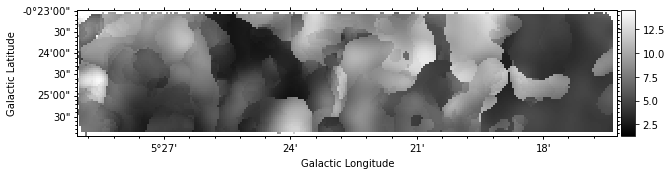

In [217]:
m17g29 = Projection(value=max_17_given29*u.K, wcs=world_argmax_map_29.wcs)
m17g29.quicklook()

INFO: Auto-setting vmin to  3.062e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.793e+01 [aplpy.core]


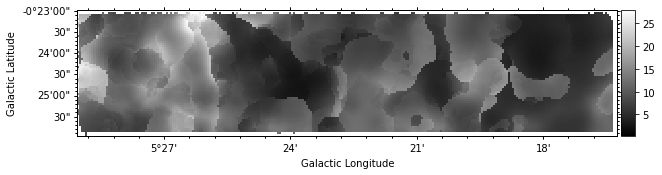

In [218]:
div_17g29 = m17g29 / max_29
div_17g29.quicklook()

In [221]:
max_29_given17 = given_max(cube_29, world_argmax_map_17)

INFO: Auto-setting vmin to  1.241e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.553e+00 [aplpy.core]


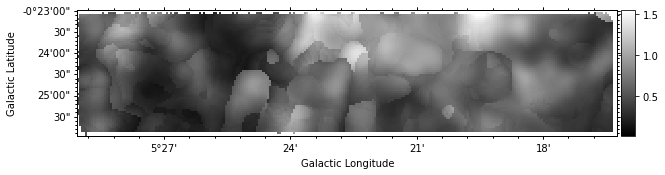

In [222]:
m29g17 = Projection(value=max_29_given17*u.K, wcs=world_argmax_map_17.wcs)
m29g17.quicklook()

INFO: Auto-setting vmin to  2.941e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.217e+01 [aplpy.core]


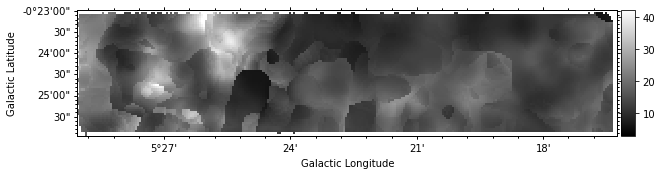

In [223]:
div_29g17 = max_17 / m29g17
div_29g17.quicklook()

In [192]:
max_17a_given29a = given_max(cube_17a, world_argmax_map_29a)

INFO: Auto-setting vmin to  1.226e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.507e+01 [aplpy.core]


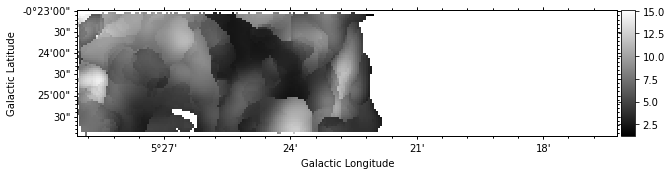

In [193]:
m17ag29a = Projection(value=max_17a_given29a*u.K, wcs=world_argmax_map_29a.wcs)
m17ag29a.quicklook()

INFO: Auto-setting vmin to  1.618e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.840e+01 [aplpy.core]


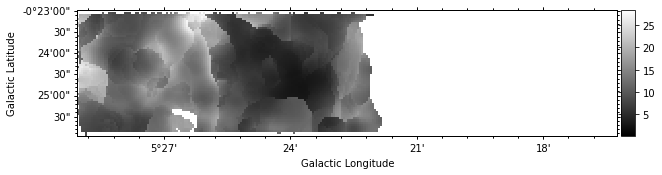

In [195]:
div_17ag29a = m17ag29a / max_29a
div_17ag29a.quicklook()

In [196]:
max_17b_given29b = given_max(cube_17b, world_argmax_map_29b)

INFO: Auto-setting vmin to  7.577e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.435e+01 [aplpy.core]


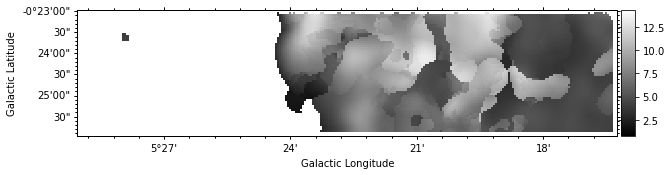

In [197]:
m17bg29b = Projection(value=max_17b_given29b*u.K, wcs=world_argmax_map_29b.wcs)
m17bg29b.quicklook()

INFO: Auto-setting vmin to  1.580e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.865e+01 [aplpy.core]


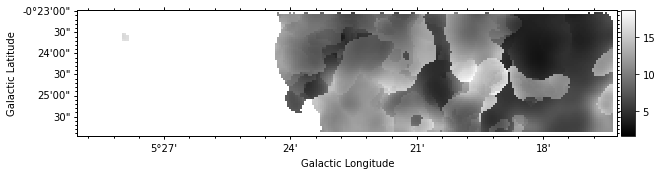

In [198]:
div_17bg29b = m17bg29b / max_29b
div_17bg29b.quicklook()

:)


<__array_function__ internals>:180: RuntimeWarning: All-NaN axis encountered


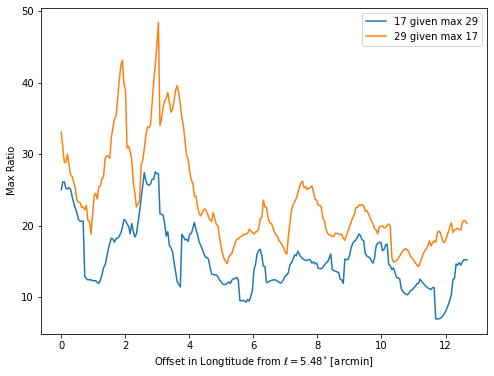

In [230]:
plt.figure(figsize=(8,6))
x = get_x(div_17bg29b)
#plt.plot(x, np.nanmax(div_17ag29a, axis=0), label='HVC')
#plt.plot(x, np.nanmax(div_17bg29b, axis=0), label='LVC')
plt.plot(x, np.nanmax(div_17g29, axis=0), label='17 given max 29')
plt.plot(x, np.nanmax(div_29g17, axis=0), label='29 given max 17')
plt.legend()
plt.xlabel("Offset in Longtitude from $\ell=5.48^{\circ}$ [arcmin]")
plt.ylabel('Max Ratio')
#print('Actually pretty good agreement :)')
print(':)')

In [100]:
max_17_give29 = np.zeros(max_17.shape)
#hh = 0

for ii in range(max_17.shape[0]):
    for jj in range(max_17.shape[1]):
        inter = interp1d(cube_17.spectral_axis, cube_17[:, ii, jj], fill_value="extrapolate")
        maxim_29 = world_argmax_map_29[ii, jj]
        max_17_give29[ii, jj] = inter(maxim_29)
        #hh += 1

INFO: Auto-setting vmin to  1.297e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.452e+01 [aplpy.core]


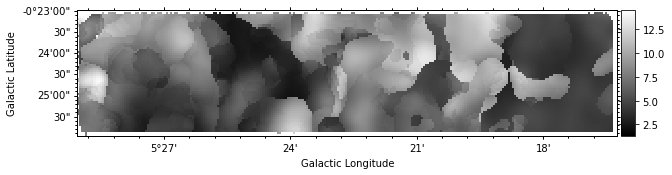

In [106]:
m_prof = Projection(value=max_17_give29*u.K, wcs=max_17.wcs)
m_prof.quicklook()

INFO: Auto-setting vmin to  2.789e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.788e+01 [aplpy.core]


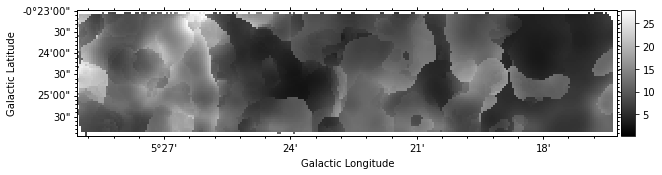

In [107]:
div_1729 = m_prof / max_29
div_1729.quicklook()

In [109]:
np.nanmax(div_1729)

<Projection 27.52109152>

In [110]:
max_29_give17 = np.zeros(max_29.shape)
#hh = 0

for ii in range(max_29.shape[0]):
    for jj in range(max_29.shape[1]):
        inter = interp1d(cube_29.spectral_axis, cube_29[:, ii, jj], fill_value="extrapolate")
        maxim_17 = world_argmax_map_17[ii, jj]
        max_29_give17[ii, jj] = inter(maxim_17)
        #hh += 1

INFO: Auto-setting vmin to  1.377e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.551e+00 [aplpy.core]


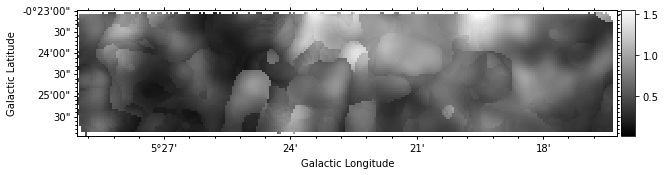

In [111]:
m_prof_29 = Projection(value=max_29_give17*u.K, wcs=max_29.wcs)
m_prof_29.quicklook()

INFO: Auto-setting vmin to  2.822e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.363e+01 [aplpy.core]


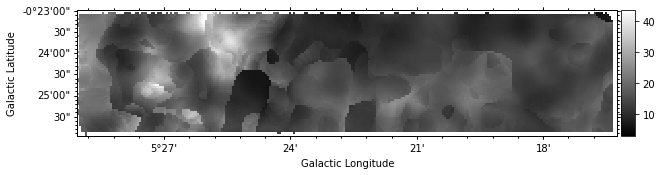

In [112]:
div_1729_alt = max_17 / m_prof_29
div_1729_alt.quicklook()

INFO: Auto-setting vmin to  7.465e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.093e+00 [aplpy.core]


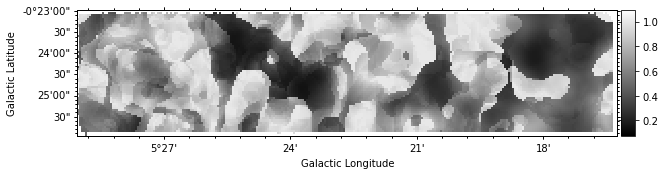

In [113]:
comparison = div_1729 / div_1729_alt
comparison.quicklook()